In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from enum import Enum

In [241]:
assert sys.version != "3.11.5" , "wrong python version"

In [242]:
dataset = pd.read_csv("dataset\student_habits_performance.csv",index_col="student_id")
dataset.iloc[10]

age                                  19
gender                           Female
study_hours_per_day                 4.6
social_media_hours                  3.7
netflix_hours                       0.8
part_time_job                        No
attendance_percentage              77.6
sleep_hours                         5.8
diet_quality                       Fair
exercise_frequency                    1
parental_education_level            NaN
internet_quality                   Good
mental_health_rating                  3
extracurricular_participation        No
exam_score                         63.3
Name: S1010, dtype: object

<Axes: xlabel='age'>

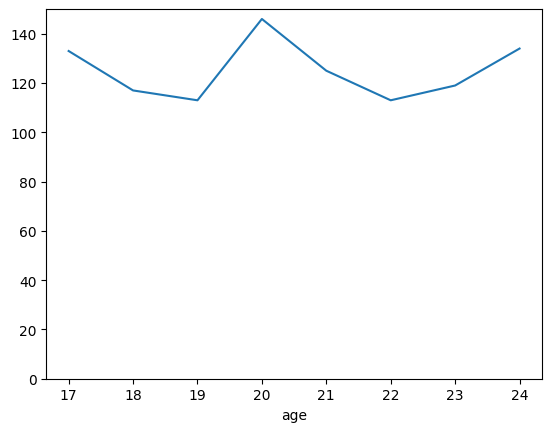

In [243]:
# pour l'age on aimerais avoir le nombre de personne de chaque age
dataset.groupby("age").size().plot(ylim=(0,150))

In [244]:
# repartition par genre
dataset.groupby("gender").size().to_frame('Number')

,Number
gender,
Female,481
Male,477
Other,42


<Axes: xlabel='exam_score'>

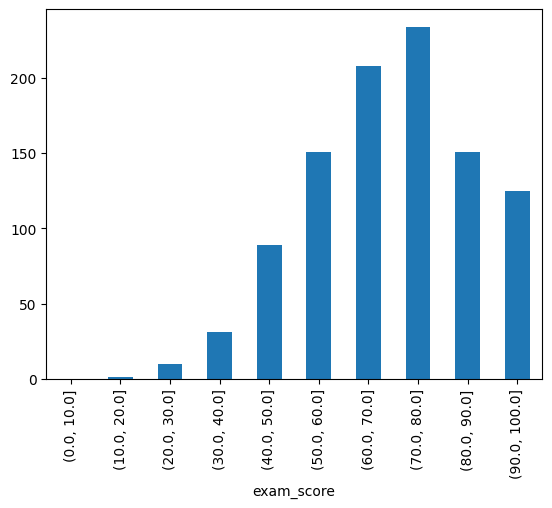

In [245]:
# on veut avoir la répartition des résultats par tranches de 10 de score
pd.cut(dataset["exam_score"],[0,10,20,30,40,50,60,70,80,90,100.0]).value_counts().sort_index().plot(kind="bar")

In [246]:
# On peut ainsi déterminer la moyenne, la médiane et l'écart-type des résultats
moyenne = dataset["exam_score"].mean()
mediane = dataset["exam_score"].median()
ecart_type = dataset["exam_score"].std()
print("moyenne : ",moyenne, ", médiane : ",mediane, " écart-type : ",ecart_type)

moyenne :  69.6015 , médiane :  70.5  écart-type :  16.888563921818257


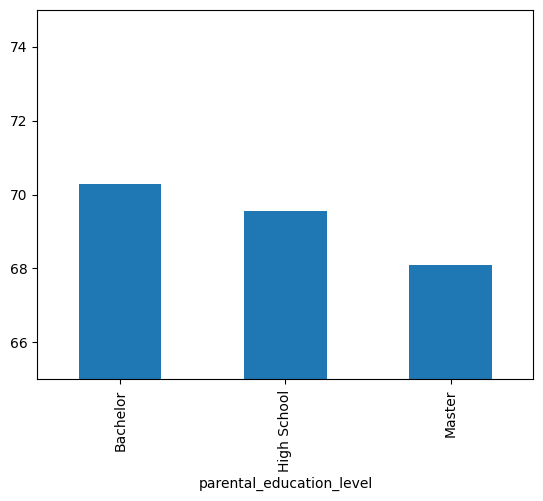

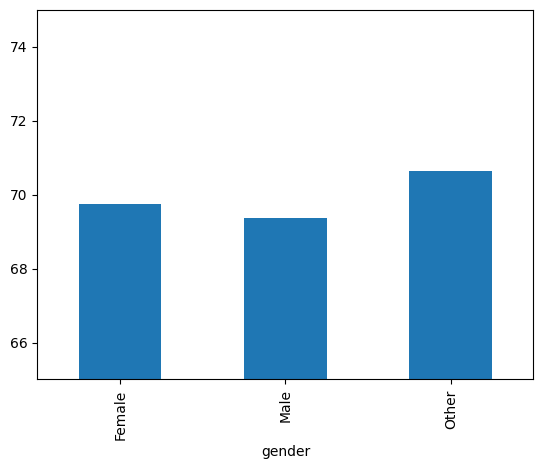

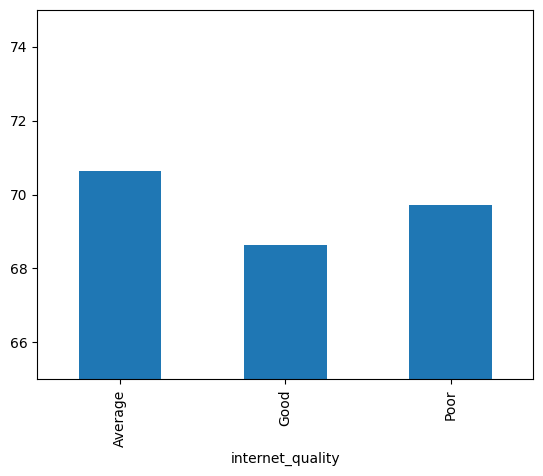

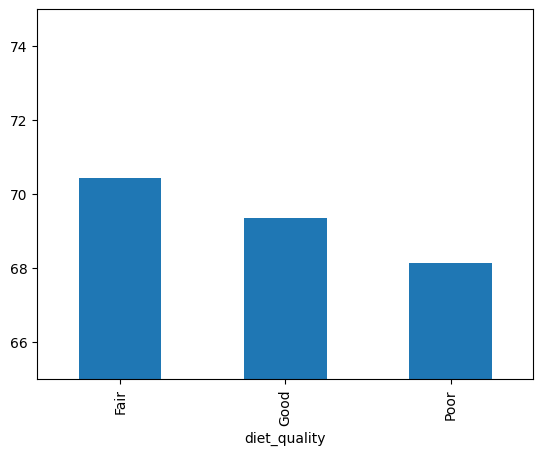

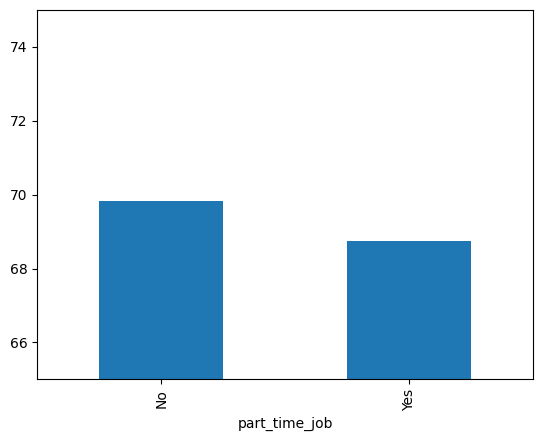

In [247]:
YLIM = (65,75)

dataset.groupby("parental_education_level")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("gender")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("internet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("diet_quality")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()
dataset.groupby("part_time_job")["exam_score"].mean().plot(kind="bar",ylim=YLIM)
plt.show()

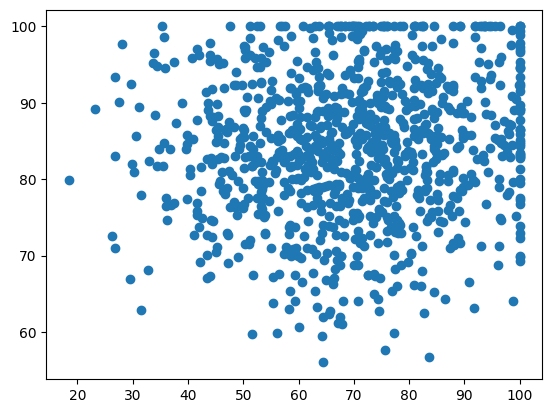

attendance


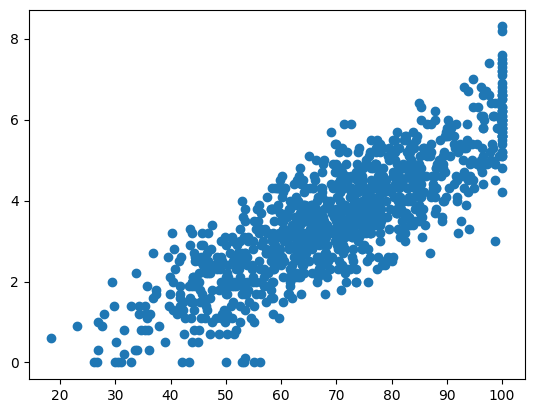

study hours


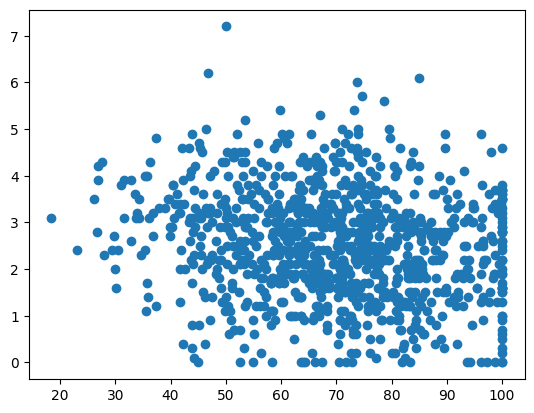

social media hours


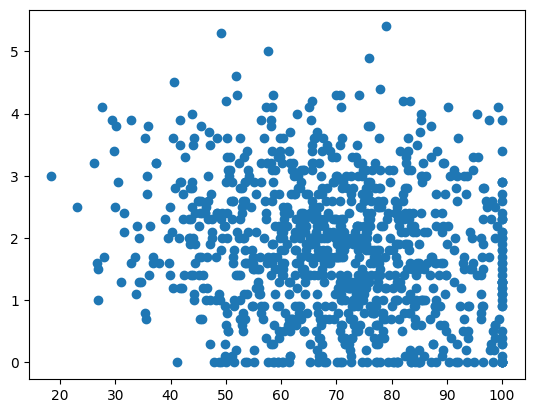

netflix hours


In [248]:
plt.scatter(dataset["exam_score"],dataset["attendance_percentage"])
plt.show()
print("attendance")
plt.scatter(dataset["exam_score"],dataset["study_hours_per_day"])
plt.show()
print("study hours")
plt.scatter(dataset["exam_score"],dataset["social_media_hours"])
plt.show()
print("social media hours")
plt.scatter(dataset["exam_score"],dataset["netflix_hours"])
plt.show()
print("netflix hours")

On arrange maintenant le dataset pour remplacer les string par des int

In [249]:
gender_map = {"Female":0,"Male":1,"Other":2}
job_map = {"No":0,"Yes":1}
diet_map  ={"Poor":0,"Fair":1,"Good":2}
parentlevel_map = {"NaN":0,"Bachelor":1,"High School":2,"Master":3}
extraactivity_map = {"No":0,"Yes":1}
internet_map = {"Poor":0,"Average":1,"Good":2}

In [250]:
dataset["gender"] = dataset["gender"].map(gender_map)
dataset["part_time_job"] = dataset["part_time_job"].map(job_map)
dataset["diet_quality"] = dataset["diet_quality"].map(diet_map)
dataset["parental_education_level"] = dataset["parental_education_level"].map(parentlevel_map)
dataset["extracurricular_participation"] = dataset["extracurricular_participation"].map(extraactivity_map)
dataset["internet_quality"] = dataset["internet_quality"].map(internet_map)

dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,23,0,0.0,1.2,1.1,0,85.0,8.0,1,6,3.0,1,8,1,56.2
S1001,20,0,6.9,2.8,2.3,0,97.3,4.6,2,6,2.0,1,8,0,100.0
S1002,21,1,1.4,3.1,1.3,0,94.8,8.0,0,1,2.0,0,1,0,34.3
S1003,23,0,1.0,3.9,1.0,0,71.0,9.2,0,4,3.0,2,1,1,26.8
S1004,19,0,5.0,4.4,0.5,0,90.9,4.9,1,3,3.0,2,1,0,66.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,21,0,2.6,0.5,1.6,0,77.0,7.5,1,2,2.0,2,6,1,76.1
S1996,17,0,2.9,1.0,2.4,1,86.0,6.8,0,1,2.0,1,6,1,65.9
S1997,20,1,3.0,2.6,1.3,0,61.9,6.5,2,5,1.0,2,9,1,64.4


<Axes: >

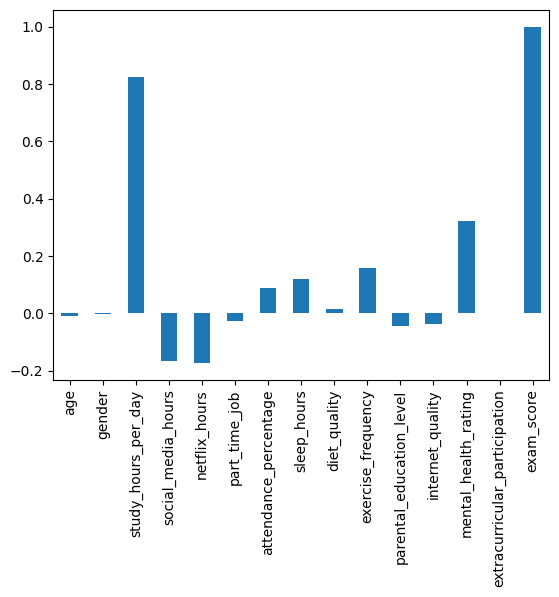

In [251]:
# correlation matrix
dataset.corr()["exam_score"].plot(kind="bar")

In [252]:
dataset["age"]=(dataset["age"]-dataset["age"].min())/(dataset["age"].max()-dataset["age"].min())
dataset["attendance_percentage"]=(dataset["attendance_percentage"]-dataset["attendance_percentage"].min())/(dataset["attendance_percentage"].max()-dataset["attendance_percentage"].min())
dataset["diet_quality"]=(dataset["diet_quality"]-dataset["diet_quality"].min())/(dataset["diet_quality"].max()-dataset["diet_quality"].min())
dataset["exercise_frequency"]=(dataset["exercise_frequency"]-dataset["exercise_frequency"].min())/(dataset["exercise_frequency"].max()-dataset["exercise_frequency"].min())
dataset["extracurricular_participation"]=(dataset["extracurricular_participation"]-dataset["extracurricular_participation"].min())/(dataset["extracurricular_participation"].max()-dataset["extracurricular_participation"].min())
dataset["gender"]=(dataset["gender"]-dataset["gender"].min())/(dataset["gender"].max()-dataset["gender"].min())
dataset["internet_quality"]=(dataset["internet_quality"]-dataset["internet_quality"].min())/(dataset["internet_quality"].max()-dataset["internet_quality"].min())
dataset["mental_health_rating"]=(dataset["mental_health_rating"]-dataset["mental_health_rating"].min())/(dataset["mental_health_rating"].max()-dataset["mental_health_rating"].min())
dataset["netflix_hours"]=(dataset["netflix_hours"]-dataset["netflix_hours"].min())/(dataset["netflix_hours"].max()-dataset["netflix_hours"].min())
dataset["parental_education_level"]=(dataset["parental_education_level"]-dataset["parental_education_level"].min())/(dataset["parental_education_level"].max()-dataset["parental_education_level"].min())
dataset["sleep_hours"]=(dataset["sleep_hours"]-dataset["sleep_hours"].min())/(dataset["sleep_hours"].max()-dataset["sleep_hours"].min())
dataset["social_media_hours"]=(dataset["social_media_hours"]-dataset["social_media_hours"].min())/(dataset["social_media_hours"].max()-dataset["social_media_hours"].min())
dataset["study_hours_per_day"]=(dataset["study_hours_per_day"]-dataset["study_hours_per_day"].min())/(dataset["study_hours_per_day"].max()-dataset["study_hours_per_day"].min())

dataset["exam_score"]=(dataset["exam_score"]-dataset["exam_score"].min())/(dataset["exam_score"].max()-dataset["exam_score"].min())
dataset

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
student_id,,,,,,,,,,,,,,,
S1000,0.857143,0.0,0.000000,0.166667,0.203704,0,0.659091,0.705882,0.5,1.000000,1.0,0.5,0.777778,1.0,0.463235
S1001,0.428571,0.0,0.831325,0.388889,0.425926,0,0.938636,0.205882,1.0,1.000000,0.5,0.5,0.777778,0.0,1.000000
S1002,0.571429,0.5,0.168675,0.430556,0.240741,0,0.881818,0.705882,0.0,0.166667,0.5,0.0,0.000000,0.0,0.194853
S1003,0.857143,0.0,0.120482,0.541667,0.185185,0,0.340909,0.882353,0.0,0.666667,1.0,1.0,0.000000,1.0,0.102941
S1004,0.285714,0.0,0.602410,0.611111,0.092593,0,0.793182,0.250000,0.5,0.500000,1.0,1.0,0.000000,0.0,0.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
S1995,0.571429,0.0,0.313253,0.069444,0.296296,0,0.477273,0.632353,0.5,0.333333,0.5,1.0,0.555556,1.0,0.707108
S1996,0.000000,0.0,0.349398,0.138889,0.444444,1,0.681818,0.529412,0.0,0.166667,0.5,0.5,0.555556,1.0,0.582108
S1997,0.428571,0.5,0.361446,0.361111,0.240741,0,0.134091,0.485294,1.0,0.833333,0.0,1.0,0.888889,1.0,0.563725


In [262]:
print(dataset.isna().sum())
dataset.dropna(inplace=True)
print(dataset.isna().sum())

age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracu

In [254]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [255]:
# load the dataset
tensor_dataset = tf.convert_to_tensor(dataset)
# split into input (X) and output (y) variables
X = np.asarray(tensor_dataset[:,0:14])
#print(type(X))
#print(X)
Y = np.asarray(tensor_dataset[:,14:15])
print(X)
print(Y)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1,random_state=0)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

[[0.85714286 0.         0.         ... 0.5        0.77777778 1.        ]
 [0.42857143 0.         0.8313253  ... 0.5        0.77777778 0.        ]
 [0.57142857 0.5        0.1686747  ... 0.         0.         0.        ]
 ...
 [0.42857143 0.5        0.36144578 ... 1.         0.88888889 1.        ]
 [1.         0.5        0.65060241 ... 0.5        0.         0.        ]
 [0.28571429 0.         0.51807229 ... 0.5        0.77777778 0.        ]]
[[0.46323529]
 [1.        ]
 [0.19485294]
 [0.10294118]
 [0.58823529]
 [1.        ]
 [0.875     ]
 [0.66421569]
 [0.74142157]
 [1.        ]
 [0.68627451]
 [0.71691176]
 [0.70343137]
 [0.74142157]
 [0.68137255]
 [0.45098039]
 [0.64215686]
 [0.3125    ]
 [0.32965686]
 [0.49142157]
 [0.78553922]
 [0.98406863]
 [0.31004902]
 [0.44730392]
 [0.63112745]
 [0.6752451 ]
 [0.64583333]
 [0.78921569]
 [0.70220588]
 [0.63970588]
 [0.40318627]
 [0.4129902 ]
 [0.40196078]
 [0.66421569]
 [0.64093137]
 [0.50245098]
 [0.48651961]
 [0.78308824]
 [0.62867647]
 [0.583333

In [256]:
print("X_train min/max:", np.min(X_train), np.max(X_train))
print("y_train min/max:", np.min(y_train), np.max(y_train))

print("Any NaN in X_train?", np.isnan(X_train).any())
print("Any NaN in y_train?", np.isnan(y_train).any())

X_train min/max: 0.0 1.0
y_train min/max: 0.0 1.0
Any NaN in X_train? False
Any NaN in y_train? False


In [257]:
N1 = 14
N2 = 5
#N3 = 60
N4 = 3
N5 = 1

epochs = 70 #2000 #3000

# define the model
model = Sequential()
model.add(Dense(N1, input_shape=(14,), activation='linear'))
model.add(Dense(N2, activation='relu'))
model.add(Dense(N4, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error',optimizer='adam')

# fit the model on the dataset
model.fit(X_train, y_train, epochs=epochs, batch_size=20,validation_data=(X_test, y_test),)


Epoch 1/70


c:\Users\EnterN1me\Documents\INSA\Semestre 8\Electif - Machine Learning\Projet\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4600 - val_loss: 0.0803
Epoch 2/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0654 - val_loss: 0.0572
Epoch 3/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0577 - val_loss: 0.0532
Epoch 4/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0549 - val_loss: 0.0508
Epoch 5/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0513 - val_loss: 0.0487
Epoch 6/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0504 - val_loss: 0.0465
Epoch 7/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0411 - val_loss: 0.0448
Epoch 8/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0401 - val_loss: 0.0418
Epoch 9/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372 - val_loss: 0.0404
Epoch 10/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0369 - val_loss: 0.0379
Epoch 11/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352 - val_loss: 0.0350
Epoch 12/70
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0331 - val_loss: 0.0328


{'loss': [0.30011409521102905, 0.06403079628944397, 0.05769974738359451, 0.054115649312734604, 0.050753042101860046, 0.04768463596701622, 0.0446835495531559, 0.042028170078992844, 0.039383891969919205, 0.03687947988510132, 0.03443002700805664, 0.03193097189068794, 0.02969519793987274, 0.027373988181352615, 0.025012878701090813, 0.022879356518387794, 0.02058732882142067, 0.018478725105524063, 0.016565700992941856, 0.014762850478291512, 0.013178180903196335, 0.011867301538586617, 0.010424661450088024, 0.009335651993751526, 0.0085302097722888, 0.0077047813683748245, 0.007091914303600788, 0.006615444552153349, 0.006281099747866392, 0.005922669544816017, 0.005546297412365675, 0.00531084556132555, 0.0052438839338719845, 0.004951531067490578, 0.0048256004229187965, 0.00472685880959034, 0.004668622277677059, 0.004533122759312391, 0.004572055768221617, 0.004545695148408413, 0.004525556694716215, 0.004360447637736797, 0.0043190340511500835, 0.004269268363714218, 0.004208803176879883, 0.004168811

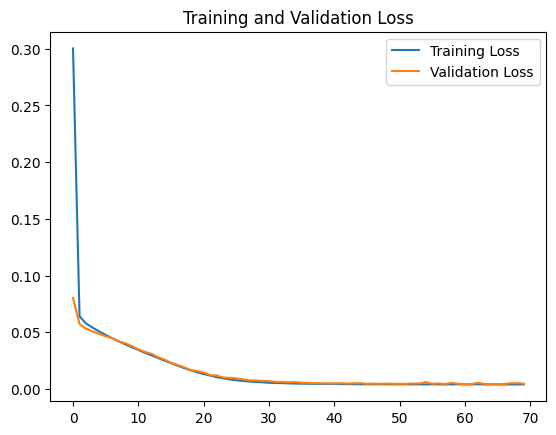

In [258]:
print(model.history.history)
loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
epochs_range = range(epochs)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


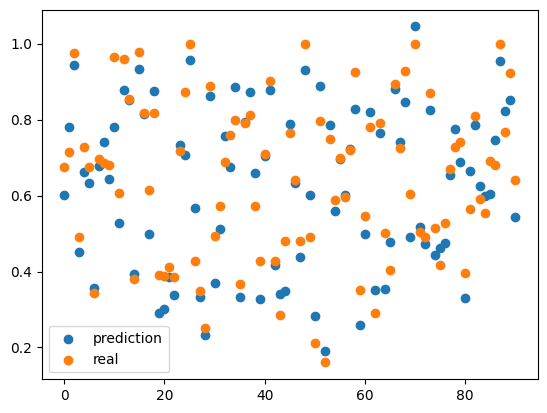

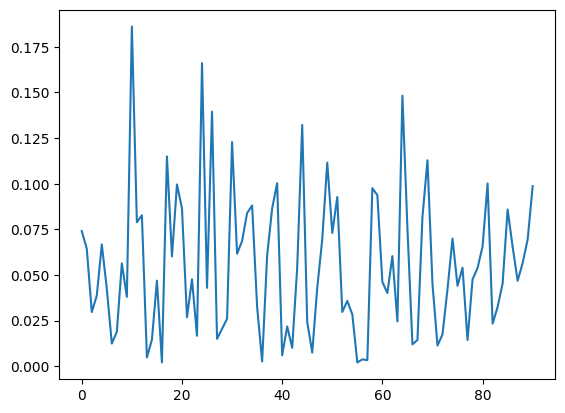

[[1.         0.         0.56626506 ... 1.         0.         0.        ]
 [0.14285714 0.         0.45783133 ... 0.5        0.77777778 0.        ]
 [0.         0.         0.62650602 ... 0.5        0.66666667 0.        ]
 ...
 [0.42857143 0.         0.63855422 ... 1.         0.55555556 0.        ]
 [0.71428571 0.         0.71084337 ... 1.         0.         1.        ]
 [0.42857143 0.         0.42168675 ... 1.         0.33333333 0.        ]]


In [259]:
### TEST
predictions = model.predict(X_test)
predictions = predictions#.reshape(1,-1)

fig, ax = plt.subplots()
ax.scatter(range(len(predictions)),predictions,label="prediction")
ax.scatter(range(len(y_test)),y_test,label="real")
ax.legend()
plt.show()
plt.plot(range(len(y_test)),abs(predictions-y_test),label="diff")
plt.show()
print(X_test)

In [260]:
model.summary()
print("weight :",model.get_weights())
predictions

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_91 (Dense)                │ (None, 14)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 5)              │            75 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 923 (3.61 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 616 (2.41 KB)

weight : [array([[-9.67157781e-02,  1.60263434e-01,  4.07656729e-01,
         3.87128741e-01, -2.62786329e-01, -3.06538999e-01,
         6.18033111e-02, -3.28065813e-01,  2.20222563e-01,
         1.40065730e-01,  3.71330976e-01, -7.01076090e-02,
         2.44847879e-01, -1.54426128e-01],
       [-3.15321416e-01,  4.44920361e-03,  5.68526566e-01,
         4.28162009e-01,  7.02583492e-02, -1.38459966e-01,
         3.76285702e-01,  1.19864717e-01, -3.95265579e-01,
         3.53874236e-01,  4.90300596e-01,  1.00497864e-01,
        -2.39539623e-01, -8.91416073e-02],
       [ 3.77329886e-01,  3.79563332e-01, -3.69445950e-01,
         8.18005085e-01,  5.26102722e-01, -6.62275970e-01,
         4.53507036e-01, -4.91070934e-02,  5.02690613e-01,
        -3.96337688e-01, -5.92032135e-01,  3.62449050e-01,
        -3.96553539e-02, -7.76046097e-01],
       [-2.33661234e-01,  5.76919973e-01, -2.28466392e-01,
        -2.38780811e-01,  3.46453130e-01, -3.27582896e-01,
        -1.90446094e-01,  1.8544940

array([[0.60243255],
       [0.7800739 ],
       [0.9445382 ],
       [0.45264995],
       [0.6624188 ],
       [0.6328068 ],
       [0.35558408],
       [0.6784129 ],
       [0.74141866],
       [0.6433602 ],
       [0.7796058 ],
       [0.52774566],
       [0.87809813],
       [0.8505281 ],
       [0.39446408],
       [0.9322659 ],
       [0.8140193 ],
       [0.49904358],
       [0.87633836],
       [0.2913354 ],
       [0.30201876],
       [0.38614273],
       [0.33837652],
       [0.7336454 ],
       [0.7065556 ],
       [0.9570313 ],
       [0.5671478 ],
       [0.33299714],
       [0.23191978],
       [0.8612624 ],
       [0.36990058],
       [0.5118633 ],
       [0.7573503 ],
       [0.67469096],
       [0.8858527 ],
       [0.3338483 ],
       [0.79431   ],
       [0.8718992 ],
       [0.66000414],
       [0.32742065],
       [0.7035455 ],
       [0.8788965 ],
       [0.4163425 ],
       [0.33960724],
       [0.3494798 ],
       [0.78890157],
       [0.6334071 ],
       [0.437

In [261]:
model.predict(np.asarray([[
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


array([[1.0272591]], dtype=float32)

normaliser toute les catégorie